In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/cleaned_heart_clinical_records.csv")
df

,age,anaemia,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,20,1,1.9,130,1,0,4,1
1,55,0,38,0,1.1,136,1,0,6,1
2,65,0,20,0,1.3,129,1,1,7,1
3,50,1,20,0,1.9,137,1,0,7,1
4,90,1,40,1,2.1,132,1,1,8,1
...,...,...,...,...,...,...,...,...,...,...
287,62,0,38,1,1.1,143,1,1,270,0
288,55,0,38,0,1.2,139,0,0,271,0
289,45,0,60,0,0.8,138,0,0,278,0
290,45,0,38,0,1.4,140,1,1,280,0


In [3]:
import seaborn as sns
plt.style.use("ggplot")

## Univariate analysis

### Box plot for ejection_fraction

**What is the ejection_fraction that required for survival and what range causes death?** Let's figure out this using box plot.

<Axes: ylabel='ejection_fraction'>

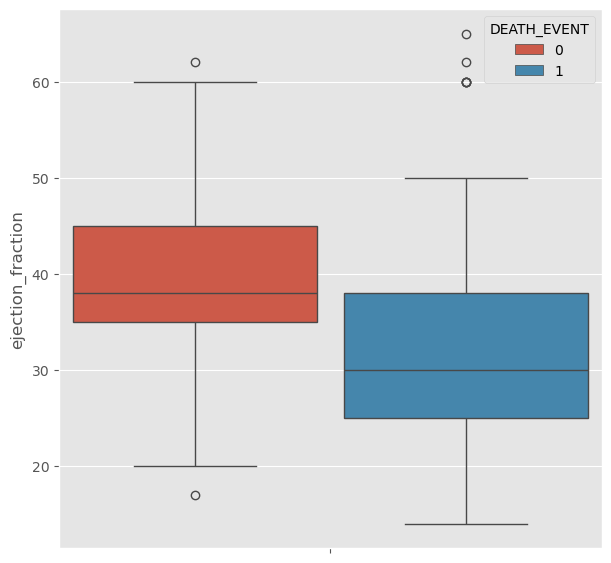

In [4]:
plt.figure(figsize=(7, 7))
sns.boxplot(data = df, y = "ejection_fraction", hue="DEATH_EVENT", gap=0.1, width=1.0)

### What this boxplot about
1. **Y-axis** : **ejection_fraction** (medical measures for heart pumping efficiency)
2. Labels :
   1. DEATH_EVENT = 0 (Survived)
   2. DEATH_EVENT = 1 (Died)

So, The above plot compares the **ejection_fraction** for **survivors and non-survivors**.

### Insights from the above boxplot.

**For survival** -
1. **Minimum (25th percentile)** - 20
2. **Median** - approx 36-38
3. **Maximum (75th percentile)** - 60

**For death** -
1. **Minimum (25th percentile)** - approx 12 - 14
2. **Median** - 30
3. **Maximum (75th percentile)** - 50

**Key insights:**
1. The person with low ejection fraction has died.
2. Survival plot more tight -> means more conistent heart function.
3. Death plot more variable -> shows variability and inconsistency.
4. Some paitents died beside having high ejection fraction.
5. Ejection_fraction is important feature but not the only feature to determine the survival of the paitent.

### Box plot for age

**What is the age that required for survival and what range causes death?** Let's figure out this using box plot.

<Axes: ylabel='age'>

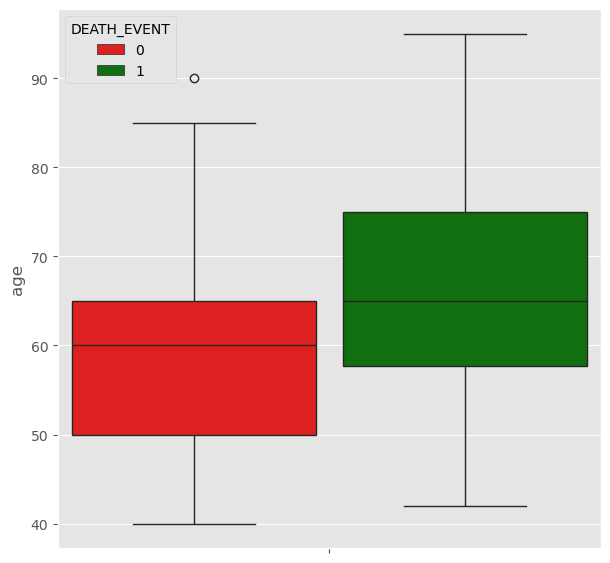

In [5]:
plt.figure(figsize=(7, 7))
sns.boxplot(data = df, y = "age", hue="DEATH_EVENT", gap=0.1, palette=['red', 'green'], width=1.0)

### What is boxplot about?

1. **Y-axis** : **age**
2. Labels :
   1. DEATH_EVENT = 0 (Survival)
   2. DEATH_EVENT = 1 (Died)

This plot shows the relation between **age** and **(survivors and non-survivors)**.

### Insights from above boxplot

**For survival** -
1. **Minimum (25th percentile)** - 85
2. **Median** - 60
3. **Maximum (75th percentile)** - 40

**For death** -
1. **Minimum (25th percentile)** - 95
2. **Median** - 65
3. **Maximum (75th percentile)** - 96

**Key insights:**
1. Older age people have high no. of deaths.
2. Outliers in survival shows that person even after having older age survives.
3. There is more spread and variability in death rates as compared to survival rates, means death can happen at any age.
4. Death/survival rates depends on age but depends on other features as well.

### Box plot for serum_creatinine

**What is the serum_creatinine that required for survival and what range causes death?** Let's figure out this using box plot.

<Axes: ylabel='serum_creatinine'>

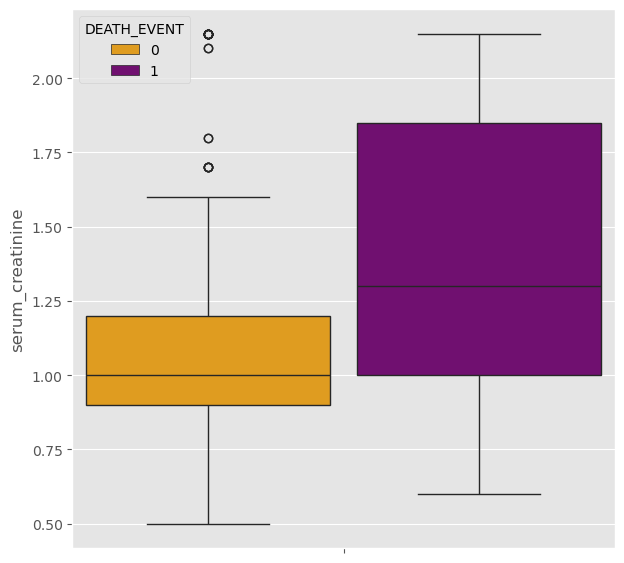

In [6]:
plt.figure(figsize=(7, 7))
sns.boxplot(data = df, y = "serum_creatinine", hue="DEATH_EVENT", gap=0.1, palette=['orange', 'purple'], width=1.0)

**What above boxplot is about?**
1. **Y-axis : serum_creatinine**
2. LABELS:
   1. 1 : Death event ocurred
   2. 0 : servived

This plot shows the how **serum_creatinine** affects the **death event**.

**Insights from above box plot**

**For survival**
* **Minimum (25th percentile)** - 0.5
* **Median** - 1.00
* **Maximum (75th percentile)** - 1.55
* There are 4 points that show abnormal behaviour.



### Box plot for serum_sodium

<Axes: ylabel='serum_sodium'>

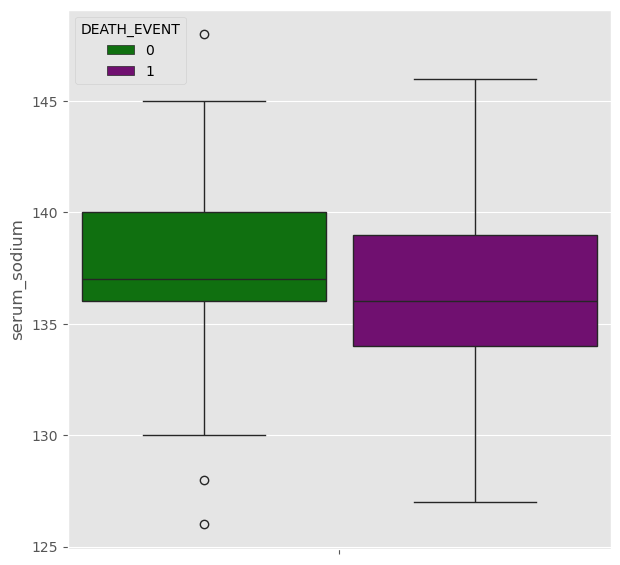

In [7]:
plt.figure(figsize=(7, 7))
sns.boxplot(data = df, y = "serum_sodium", hue="DEATH_EVENT", gap=0.1, palette=['green', 'purple'], width=1.0)

### Box plot for time

<Axes: ylabel='time'>

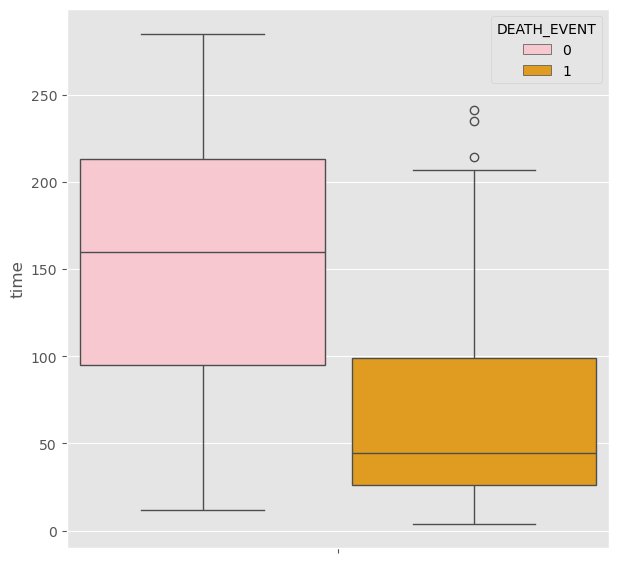

In [8]:
plt.figure(figsize=(7, 7))
sns.boxplot(data = df, y = "time", hue="DEATH_EVENT", gap=0.1, palette = ['pink', 'orange'], width=1.0)

In [9]:
df.head()

,age,anaemia,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,20,1,1.9,130,1,0,4,1
1,55,0,38,0,1.1,136,1,0,6,1
2,65,0,20,0,1.3,129,1,1,7,1
3,50,1,20,0,1.9,137,1,0,7,1
4,90,1,40,1,2.1,132,1,1,8,1


In [11]:
df.dtypes

age                      int64
anaemia                  int64
ejection_fraction        int64
high_blood_pressure      int64
serum_creatinine       float64
serum_sodium             int64
sex                      int64
smoking                  int64
time                     int64
DEATH_EVENT              int64
dtype: object

<Axes: xlabel='smoking', ylabel='count'>

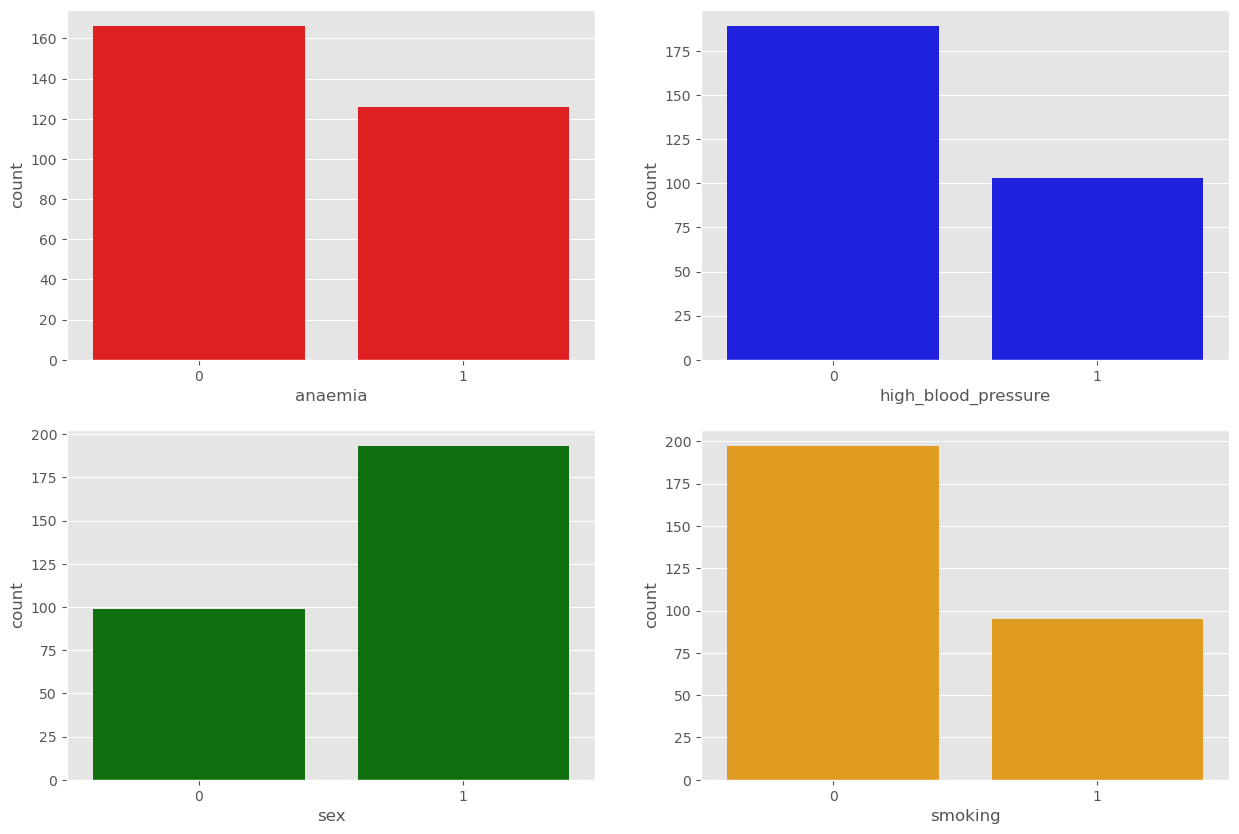

In [20]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
sns.barplot(df['anaemia'].value_counts(), color='red', ax=ax1)
sns.barplot(df['high_blood_pressure'].value_counts(), color='blue', ax=ax2)
sns.barplot(df['sex'].value_counts(), color='green', ax=ax3)
sns.barplot(df['smoking'].value_counts(), color='orange', ax=ax4)

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

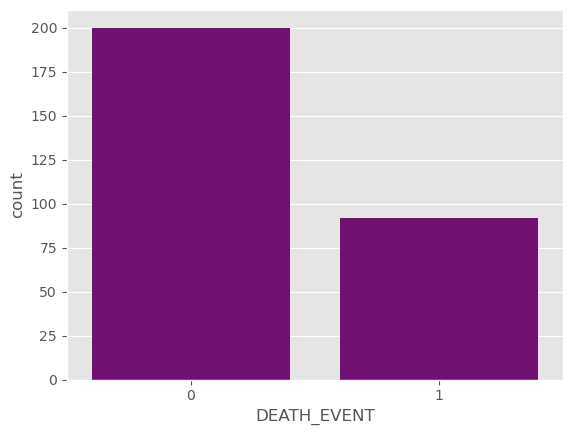

In [21]:
sns.barplot(df['DEATH_EVENT'].value_counts(), color='purple')

<Axes: xlabel='ejection_fraction', ylabel='Count'>

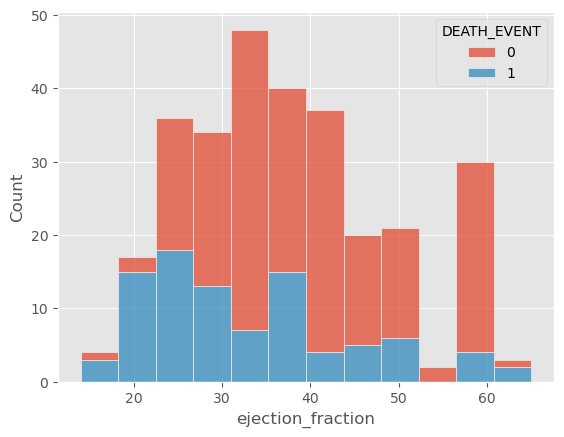

In [28]:
sns.histplot(df, x='ejection_fraction', hue='DEATH_EVENT', multiple='stack')

<Axes: xlabel='serum_creatinine', ylabel='Count'>

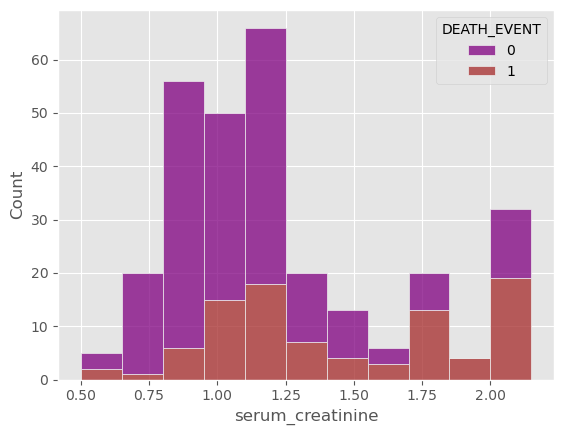

In [30]:
sns.histplot(df, x='serum_creatinine', hue='DEATH_EVENT', multiple='stack', palette=['purple', 'brown'])

<Axes: xlabel='time', ylabel='Count'>

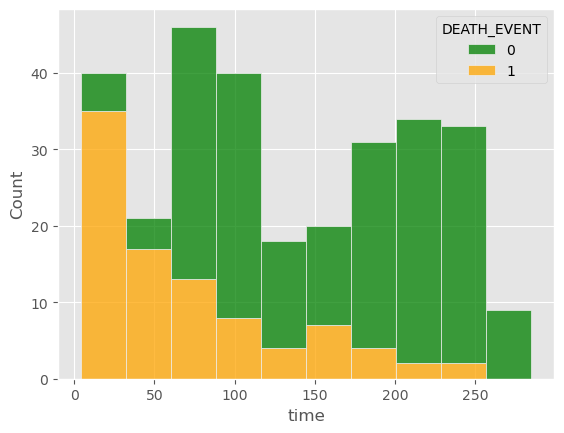

In [31]:
sns.histplot(df, x='time', hue='DEATH_EVENT', multiple='stack', palette=['green', 'orange'])

<Axes: xlabel='serum_sodium', ylabel='Count'>

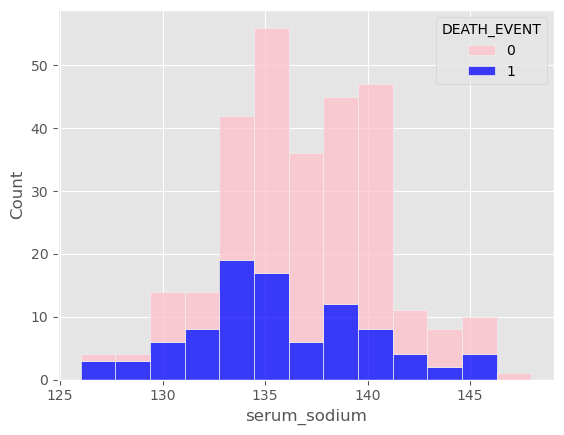

In [36]:
sns.histplot(df, x='serum_sodium', hue='DEATH_EVENT', multiple='stack', palette=['pink', 'blue'])

<Axes: xlabel='age', ylabel='Count'>

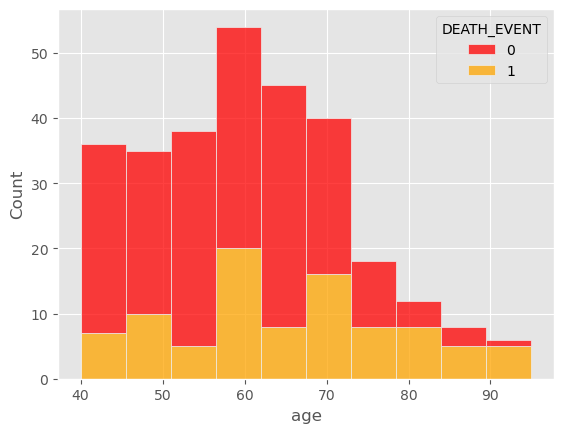

In [35]:
sns.histplot(df, x='age', hue='DEATH_EVENT', multiple='stack', palette=['red', 'orange'])